# Regresja

In [107]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import metrics
cleaned_data = pd.read_excel('clean_data_relevant.xlsx')

In [108]:
from sklearn.model_selection import train_test_split

X = cleaned_data.drop(columns='PRICE')
y = cleaned_data['PRICE']
#y = np.round(y, decimals=-2) #przy cenach posiadłości część dzisiętna nie ma aż tak dużo znaczenia znaczenia. Zakładając że ostatnie 2 miejsca wynoszą 99 to nawet dla minimalnej wartości w zbiorze danych stonowi to jedynie 0.2%

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
trained_models = []

## Modele

### Linear Model - model podstawowy

In [110]:
from sklearn.linear_model import LinearRegression, HuberRegressor

reg = LinearRegression().fit(X_train, y_train)

print('Współczynniki: ',reg.coef_)
print('Wyraz wolny', reg.intercept_)

y_pred = reg.predict(X_test)


cv_score = cross_val_score(estimator = reg, X = X_train, y = y_train, cv = 20)

RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2 = reg.score(X_test, y_test)

print('RMSE:', round(RMSE,4))
print('R2:', round(R2,4))
print("Cross Validated R2: ", list(map(lambda x: round(x,4) ,cv_score)))
print("Mean Cross Validated R2: ", round(cv_score.mean(),4) )
print("Min Cross Validated R2: ", round(cv_score.min(),4) )
print("Max Cross Validated R2: ", round(cv_score.max(),4) )
trained_models.append(['Linear Model', round(RMSE,2) , round(R2,4), round(cv_score.mean(),4), round(cv_score.min(),4), round(cv_score.max(),4), list(map(lambda x: round(x,4) ,cv_score)) ])


Współczynniki:  [-2.62662002e+01  4.24832500e+01  1.06273516e+06  4.69906579e+05
 -6.05030269e+04 -3.92187261e+05  2.54220037e+03 -2.47245377e+06
 -1.27279034e+04  9.00825889e+06  8.25126303e+06]
Wyraz wolny -556946.2474463198
RMSE: 2607779.3068
R2: 0.3508
Cross Validated R2:  [0.3459, 0.1563, 0.5221, 0.4182, 0.3481, 0.2682, 0.0582, 0.1891, 0.5465, 0.2921, 0.1511, 0.4439, 0.0411, 0.2398, 0.4886, 0.5675, 0.4712, 0.5468, -0.0858, 0.2289]
Mean Cross Validated R2:  0.3119
Min Cross Validated R2:  -0.0858
Max Cross Validated R2:  0.5675


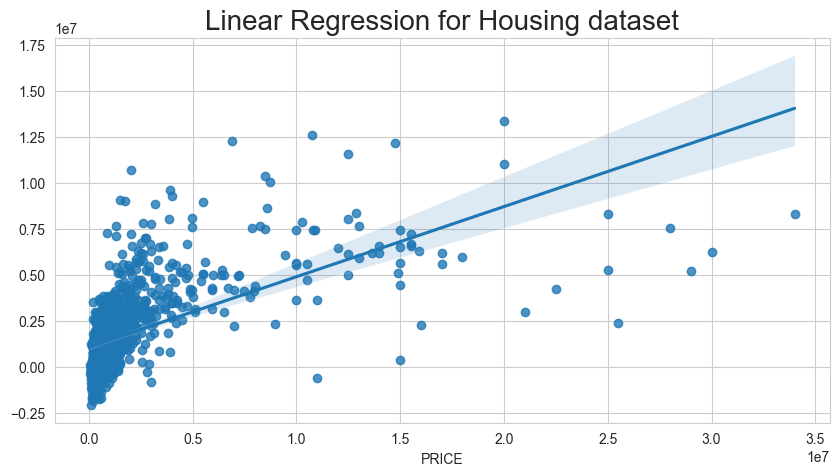

In [111]:
plt.figure(figsize = (10,5))
sns.regplot(x=y_test,y=y_pred)
plt.title('Linear Regression for Housing dataset', fontsize = 20)
plt.show()

In [112]:
from sklearn.linear_model import LinearRegression, HuberRegressor

reg = HuberRegressor().fit(X_train, y_train)

print('Współczynniki: ',reg.coef_)
print('Wyraz wolny', reg.intercept_)

y_pred = reg.predict(X_test)


cv_score = cross_val_score(estimator = reg, X = X_train, y = y_train, cv = 20)

RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2 = reg.score(X_test, y_test)

print('RMSE:', round(RMSE,4))
print('R2:', round(R2,4))
print("Cross Validated R2: ", list(map(lambda x: round(x,4) ,cv_score)))
print("Mean Cross Validated R2: ", round(cv_score.mean(),4) )
print("Min Cross Validated R2: ", round(cv_score.min(),4) )
print("Max Cross Validated R2: ", round(cv_score.max(),4) )
trained_models.append(['Huber Model', round(RMSE,2) , round(R2,4), round(cv_score.mean(),4), round(cv_score.min(),4), round(cv_score.max(),4), list(map(lambda x: round(x,4) ,cv_score)) ])


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lb

Współczynniki:  [ 1.15488419e+02  3.04331673e+02  1.01719685e+05  6.46626790e+04
  9.47775432e+04 -2.04047143e+05  2.05971960e+03  8.09933323e+04
 -1.97038550e+03  1.10450943e+05  9.12503536e+04]
Wyraz wolny 136142.21073510646


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lb

RMSE: 3200795.1635
R2: 0.0219
Cross Validated R2:  [0.0194, 0.114, 0.0469, 0.0203, -0.0096, -0.0125, 0.102, 0.061, -0.0349, -0.0148, -0.0231, 0.0076, 0.0263, -0.0162, 0.0092, 0.0354, 0.0472, 0.0104, 0.1469, -0.0219]
Mean Cross Validated R2:  0.0257
Min Cross Validated R2:  -0.0349
Max Cross Validated R2:  0.1469


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lb

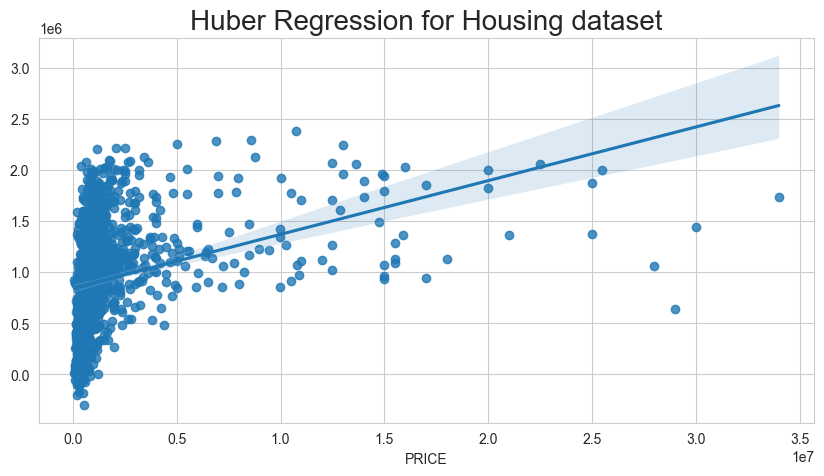

In [113]:
plt.figure(figsize = (10,5))
sns.regplot(x=y_test,y=y_pred)
plt.title('Huber Regression for Housing dataset', fontsize = 20)
plt.show()

### Forest Regressor

In [114]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators = 10, random_state = 0)
forest_reg.fit(X_train, y_train)
y_pred = forest_reg.predict(X_test)


cv_score = cross_val_score(estimator = forest_reg, X = X_train, y = y_train, cv = 20)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2 = forest_reg.score(X_test, y_test)

print('RMSE:', round(RMSE,4))
print('R2:', round(R2,4))
print("Cross Validated R2: ", list(map(lambda x: round(x,4) ,cv_score)))
print("Mean Cross Validated R2: ", round(cv_score.mean(),4) )
print("Min Cross Validated R2: ", round(cv_score.min(),4) )
print("Max Cross Validated R2: ", round(cv_score.max(),4) )
trained_models.append(['Forest Regressor Model = 10 trees', round(RMSE,2) , round(R2,4), round(cv_score.mean(),4), round(cv_score.min(),4), round(cv_score.max(),4), list(map(lambda x: round(x,4) ,cv_score)) ])


RMSE: 1952348.8484
R2: 0.6361
Cross Validated R2:  [0.7656, 0.1409, 0.7448, 0.4574, 0.7044, 0.3263, 0.5251, 0.2326, 0.8105, 0.4986, 0.0779, 0.3054, 0.313, 0.4512, 0.5751, 0.7607, 0.8561, 0.6219, 0.0762, 0.2642]
Mean Cross Validated R2:  0.4754
Min Cross Validated R2:  0.0762
Max Cross Validated R2:  0.8561


In [115]:
from sklearn.ensemble import RandomForestRegressor

forest_reg_30 = RandomForestRegressor(n_estimators = 30, random_state = 0)
forest_reg_30.fit(X_train, y_train)
y_pred = forest_reg_30.predict(X_test)


cv_score = cross_val_score(estimator = forest_reg_30, X = X_train, y = y_train, cv = 20)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2 = forest_reg_30.score(X_test, y_test)

print('RMSE:', round(RMSE,4))
print('R2:', round(R2,4))
print("Cross Validated R2: ", list(map(lambda x: round(x,4) ,cv_score)))
print("Mean Cross Validated R2: ", round(cv_score.mean(),4) )
print("Min Cross Validated R2: ", round(cv_score.min(),4) )
print("Max Cross Validated R2: ", round(cv_score.max(),4) )
trained_models.append(['Forest Regressor Model = 30 trees', round(RMSE,2) , round(R2,4), round(cv_score.mean(),4), round(cv_score.min(),4), round(cv_score.max(),4), list(map(lambda x: round(x,4) ,cv_score)) ])


RMSE: 1839729.6748
R2: 0.6769
Cross Validated R2:  [0.7378, 0.1756, 0.8054, 0.4524, 0.6257, 0.4123, 0.5437, 0.3949, 0.8662, 0.4623, 0.3145, 0.308, 0.2175, 0.4374, 0.7375, 0.763, 0.8555, 0.6177, 0.4826, 0.4248]
Mean Cross Validated R2:  0.5317
Min Cross Validated R2:  0.1756
Max Cross Validated R2:  0.8662


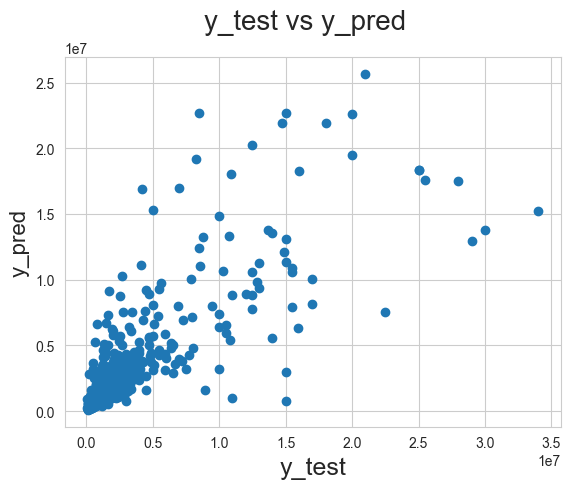

In [116]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

### Decision Tree

In [117]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_test)


cv_score = cross_val_score(estimator = tree_reg, X = X_train, y = y_train, cv = 20)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2 = tree_reg.score(X_test, y_test)

print('RMSE:', round(RMSE,4))
print('R2:', round(R2,4))
print("Cross Validated R2: ", list(map(lambda x: round(x,4) ,cv_score)))
print("Mean Cross Validated R2: ", round(cv_score.mean(),4) )
print("Min Cross Validated R2: ", round(cv_score.min(),4) )
print("Max Cross Validated R2: ", round(cv_score.max(),4) )
trained_models.append(['Decision Tree', round(RMSE,2) , round(R2,4), round(cv_score.mean(),4), round(cv_score.min(),4), round(cv_score.max(),4), list(map(lambda x: round(x,4) ,cv_score)) ])


RMSE: 3450964.6662
R2: -0.137
Cross Validated R2:  [0.7902, -1.1329, -0.4323, 0.4188, -0.7729, -0.3678, 0.1557, 0.3707, 0.6583, -0.5554, 0.1426, -0.3041, -3.7446, 0.3403, 0.4285, 0.28, 0.075, -0.1611, -0.7749, 0.2459]
Mean Cross Validated R2:  -0.217
Min Cross Validated R2:  -3.7446
Max Cross Validated R2:  0.7902


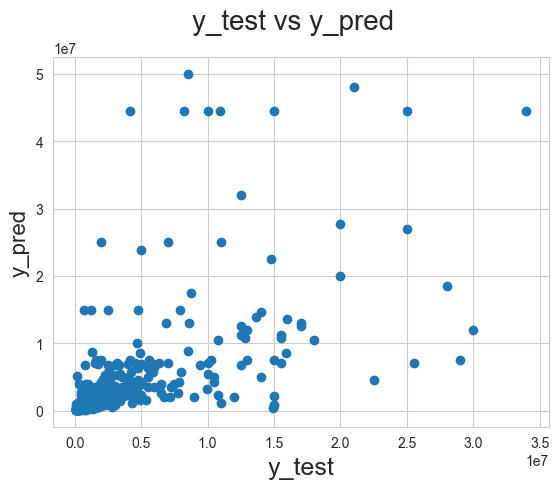

In [118]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

### Ridge Regression

In [119]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=3, solver="cholesky")
ridge_reg.fit(X_train, y_train)
y_pred = ridge_reg.predict(X_test)


cv_score = cross_val_score(estimator = ridge_reg, X = X_train, y = y_train, cv = 20)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2 = ridge_reg.score(X_test, y_test)

print('RMSE:', round(RMSE,4))
print('R2:', round(R2,4))
print("Cross Validated R2: ", list(map(lambda x: round(x,4) ,cv_score)))
print("Mean Cross Validated R2: ", round(cv_score.mean(),4) )
print("Min Cross Validated R2: ", round(cv_score.min(),4) )
print("Max Cross Validated R2: ", round(cv_score.max(),4) )
trained_models.append(['Ridge Model', round(RMSE,2) , round(R2,4), round(cv_score.mean(),4), round(cv_score.min(),4), round(cv_score.max(),4), list(map(lambda x: round(x,4) ,cv_score)) ])


RMSE: 2604635.2362
R2: 0.3523
Cross Validated R2:  [0.3423, 0.1846, 0.5225, 0.4142, 0.3424, 0.2672, 0.0838, 0.1974, 0.5331, 0.2871, 0.1577, 0.456, 0.0784, 0.2423, 0.4833, 0.5581, 0.457, 0.5479, -0.0001, 0.229]
Mean Cross Validated R2:  0.3192
Min Cross Validated R2:  -0.0001
Max Cross Validated R2:  0.5581


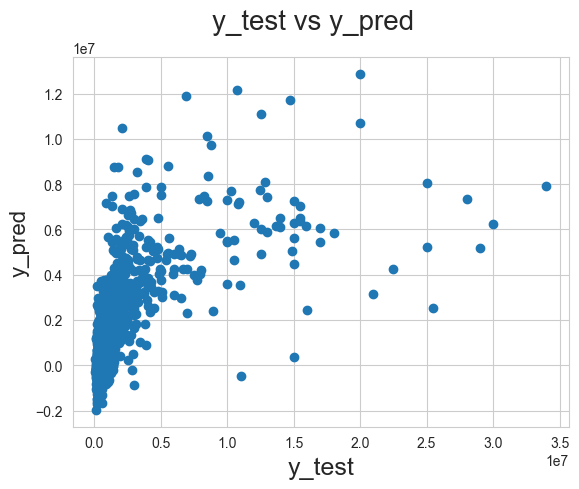

In [120]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

### XGBoost

In [121]:
from xgboost import XGBRegressor

XGBR = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.8, colsample_bytree=0.8)
XGBR.fit(X_train, y_train)
y_pred = XGBR.predict(X_test)


cv_score = cross_val_score(estimator = XGBR, X = X_train, y = y_train, cv = 20)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2 = XGBR.score(X_test, y_test)

print('RMSE:', round(RMSE,4))
print('R2:', round(R2,4))
print("Cross Validated R2: ", list(map(lambda x: round(x,4) ,cv_score)))
print("Mean Cross Validated R2: ", round(cv_score.mean(),4) )
print("Min Cross Validated R2: ", round(cv_score.min(),4) )
print("Max Cross Validated R2: ", round(cv_score.max(),4) )
trained_models.append(['XGBRegressor', round(RMSE,2) , round(R2,4), round(cv_score.mean(),4), round(cv_score.min(),4), round(cv_score.max(),4), list(map(lambda x: round(x,4) ,cv_score)) ])

RMSE: 1880314.408
R2: 0.6625
Cross Validated R2:  [0.785, 0.1031, 0.63, 0.7369, 0.7016, 0.4228, 0.4052, 0.4481, 0.9119, 0.6043, 0.5827, -0.0329, 0.4262, 0.6107, 0.6444, 0.7797, 0.8411, 0.6904, 0.5899, 0.4816]
Mean Cross Validated R2:  0.5681
Min Cross Validated R2:  -0.0329
Max Cross Validated R2:  0.9119


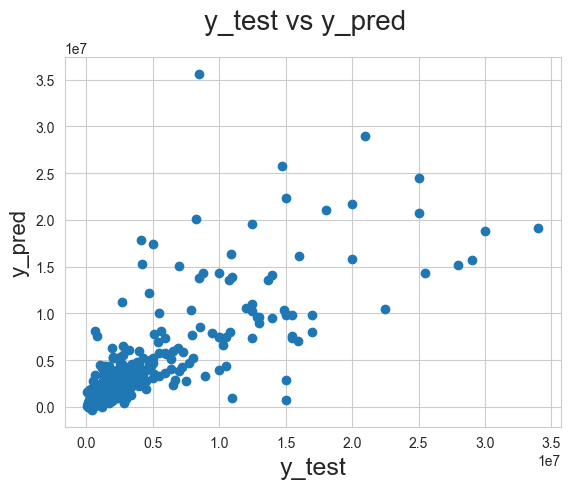

In [122]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)                         
plt.show()

### SVR

In [125]:
from sklearn.svm import SVR
svr_clf = SVR(kernel = 'rbf')

svr_clf.fit(X_train, y_train)
y_pred = svr_clf.predict(X_test)

cv_score = cross_val_score(estimator = svr_clf, X = X_train, y = y_train, cv = 20)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2 = svr_clf.score(X_test, y_test)

print('RMSE:', round(RMSE,4))
print('R2:', round(R2,4))
print("Cross Validated R2: ", list(map(lambda x: round(x,4) ,cv_score)))
print("Mean Cross Validated R2: ", round(cv_score.mean(),4) )
print("Min Cross Validated R2: ", round(cv_score.min(),4) )
print("Max Cross Validated R2: ", round(cv_score.max(),4) )
trained_models.append(['SVR', round(RMSE,2) , round(R2,4), round(cv_score.mean(),4), round(cv_score.min(),4), round(cv_score.max(),4), list(map(lambda x: round(x,4) ,cv_score)) ])

RMSE: 3366017.484
R2: -0.0817
Cross Validated R2:  [-0.056, -0.1082, -0.1063, -0.0855, -0.0628, -0.0479, -0.0372, -0.0459, -0.0885, -0.0641, -0.0652, -0.134, -0.1696, -0.0637, -0.0861, -0.0799, -0.0733, -0.0934, -0.0609, -0.0494]
Mean Cross Validated R2:  -0.0789
Min Cross Validated R2:  -0.1696
Max Cross Validated R2:  -0.0372


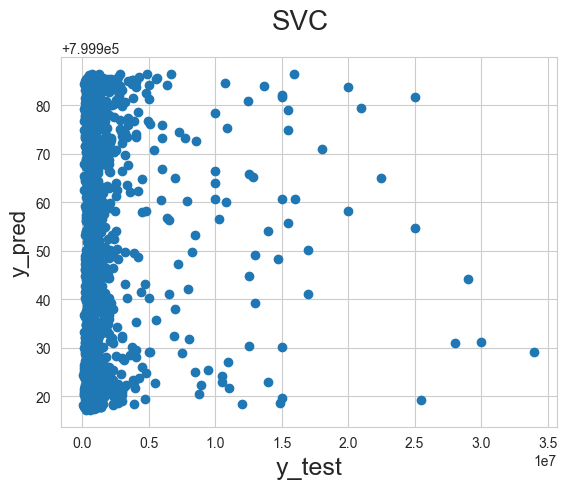

In [126]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('SVR', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

### Bayesian regression

In [127]:
from sklearn.linear_model import BayesianRidge
bayesian_reg = BayesianRidge()
bayesian_reg.fit(X_train, y_train)
y_pred = svc_clf.predict(X_test)


cv_score = cross_val_score(estimator = bayesian_reg, X = X_train, y = y_train, cv = 20)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2 = bayesian_reg.score(X_test, y_test)

print('RMSE:', round(RMSE,4))
print('R2:', round(R2,4))
print("Cross Validated R2: ", list(map(lambda x: round(x,4) ,cv_score)))
print("Mean Cross Validated R2: ", round(cv_score.mean(),4) )
print("Min Cross Validated R2: ", round(cv_score.min(),4) )
print("Max Cross Validated R2: ", round(cv_score.max(),4) )
trained_models.append(['Bayesian Reg', round(RMSE,2) , round(R2,4), round(cv_score.mean(),4), round(cv_score.min(),4), round(cv_score.max(),4), list(map(lambda x: round(x,4) ,cv_score)) ])

RMSE: 3403702.7563
R2: 0.3512
Cross Validated R2:  [0.3452, 0.1624, 0.5224, 0.4175, 0.347, 0.2681, 0.0643, 0.1911, 0.5436, 0.2911, 0.1525, 0.4468, 0.049, 0.2404, 0.4876, 0.5656, 0.468, 0.5475, -0.067, 0.229]
Mean Cross Validated R2:  0.3136
Min Cross Validated R2:  -0.067
Max Cross Validated R2:  0.5656


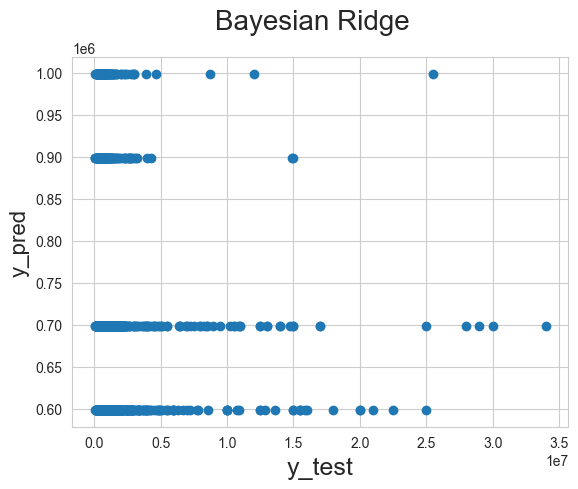

In [128]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('Bayesian Ridge', fontsize=20)
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

## Podsumowanie Regresji

In [129]:
trained_models = pd.DataFrame( trained_models, columns=['Model','RMSE','R2 Score','Mean Cross Validated R2 Score','Min Cross Validated R2 Score','Max Cross Validated R2 Score','Cross Validated R2 Scores'])
trained_models

,Model,RMSE,R2 Score,Mean Cross Validated R2 Score,Min Cross Validated R2 Score,Max Cross Validated R2 Score,Cross Validated R2 Scores
0,Linear Model,2607779.31,0.3508,0.3119,-0.0858,0.5675,"[0.3459, 0.1563, 0.5221, 0.4182, 0.3481, 0.268..."
1,Huber Model,3200795.16,0.0219,0.0257,-0.0349,0.1469,"[0.0194, 0.114, 0.0469, 0.0203, -0.0096, -0.01..."
2,Forest Regressor Model = 10 trees,1952348.85,0.6361,0.4754,0.0762,0.8561,"[0.7656, 0.1409, 0.7448, 0.4574, 0.7044, 0.326..."
3,Forest Regressor Model = 30 trees,1839729.67,0.6769,0.5317,0.1756,0.8662,"[0.7378, 0.1756, 0.8054, 0.4524, 0.6257, 0.412..."
4,Decision Tree,3450964.67,-0.1370,-0.2170,-3.7446,0.7902,"[0.7902, -1.1329, -0.4323, 0.4188, -0.7729, -0..."
5,Ridge Model,2604635.24,0.3523,0.3192,-0.0001,0.5581,"[0.3423, 0.1846, 0.5225, 0.4142, 0.3424, 0.267..."
6,XGBRegressor,1880314.41,0.6625,0.5681,-0.0329,0.9119,"[0.785, 0.1031, 0.63, 0.7369, 0.7016, 0.4228, ..."
7,Logistic Regression,3301277.63,0.0067,0.0051,0.0000,0.0190,"[0.0, 0.019, 0.0127, 0.0, 0.0063, 0.0063, 0.00..."
8,SVR,3366017.48,-0.0817,-0.0789,-0.1696,-0.0372,"[-0.056, -0.1082, -0.1063, -0.0855, -0.0628, -..."
9,Bayesian Reg,3403702.76,0.3512,0.3136,-0.0670,0.5656,"[0.3452, 0.1624, 0.5224, 0.4175, 0.347, 0.2681..."


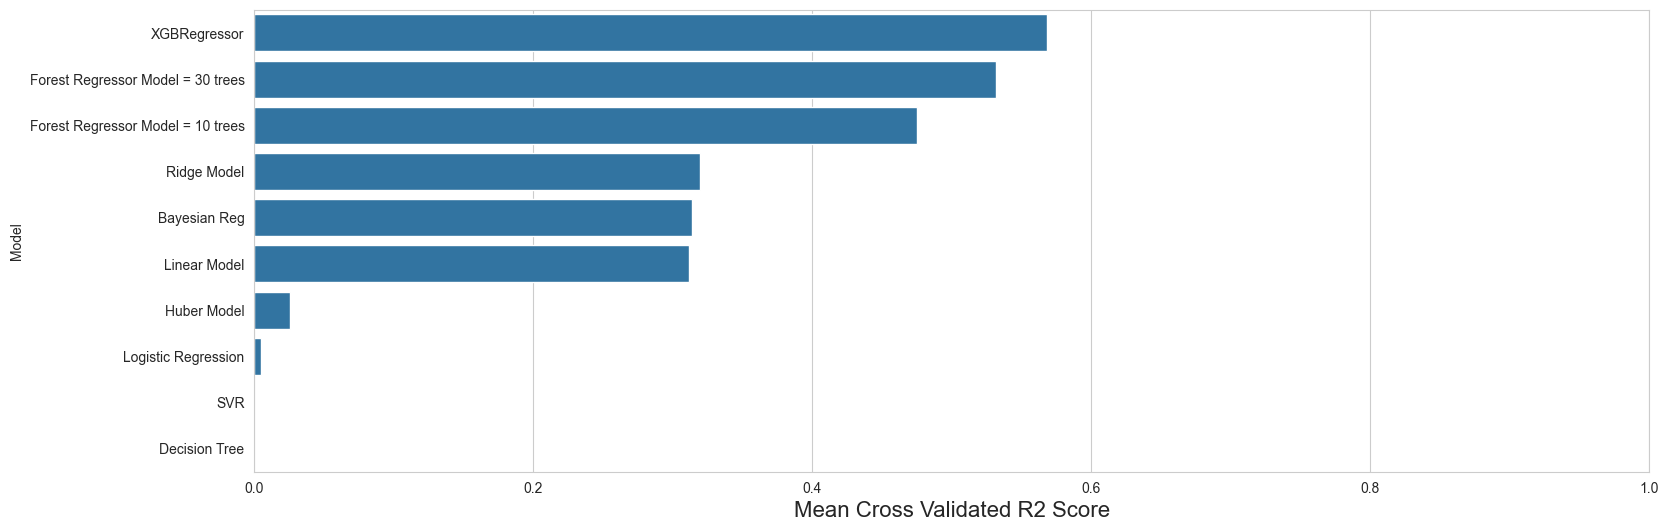

In [130]:
f, axe = plt.subplots(1,1, figsize=(18,6))

trained_models.sort_values(by=['Mean Cross Validated R2 Score'], ascending=False, inplace=True)

sns.barplot(x='Mean Cross Validated R2 Score', y='Model', data = trained_models, ax = axe)
axe.set_xlabel('Mean Cross Validated R2 Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)

plt.show()

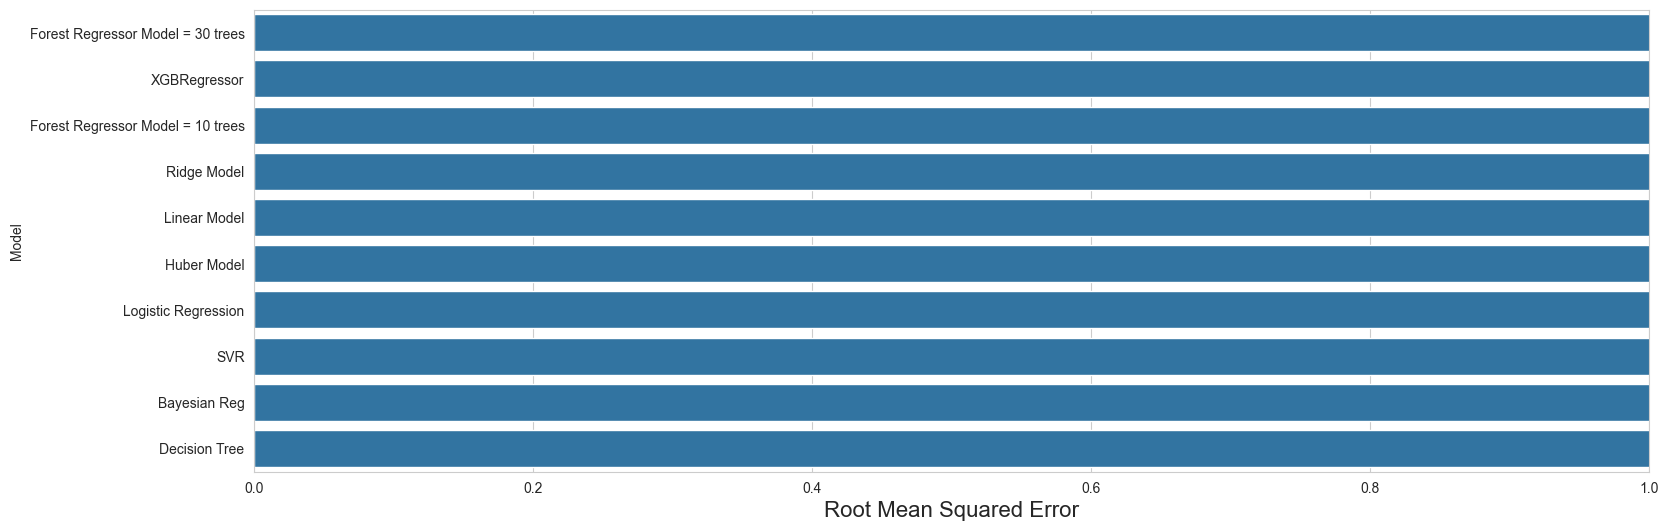

In [131]:
f, axe = plt.subplots(1,1, figsize=(18,6))

trained_models.sort_values(by=['RMSE'], ascending=True, inplace=True)

sns.barplot(x='RMSE', y='Model', data = trained_models, ax = axe)
axe.set_xlabel('Root Mean Squared Error', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)

plt.show()

# Klasyfikacja cen

Dzielimy zbiór danych na 5 przedziałów, aby móc przewidzieć etykiety zamiast wartości ciągłych.

In [132]:
import pandas as pd
X = cleaned_data.drop(columns='PRICE')
y = cleaned_data['PRICE']
y = np.round(y, decimals=-3) #przy cenach posiadłości część nie ma aż tak dużo znaczenia znaczenia. Zakładając że ostatnie 2 miejsca wynoszą 99 to nawet dla minimalnej wartości w zbiorze danych stonowi to jedynie 0.2%

sorted_prices = y.sort_values()

categories = pd.qcut(sorted_prices, q=3, labels=[ 'Low',  'Medium', 'High'])

category_ranges = {}
for category in categories.cat.categories:
    min_val = sorted_prices[categories == category].min()
    max_val = sorted_prices[categories == category].max()
    category_ranges[category] = (min_val, max_val)

print("Wartości dla każdego przedziału:")
for category, (min_val, max_val) in category_ranges.items():
    print(f"{category}: {min_val} - {max_val}")

Wartości dla każdego przedziału:
Low: 50000 - 599000
Medium: 600000 - 1175000
High: 1180000 - 60000000


In [133]:
y =  y.apply(lambda x: 0 if x < 599000 else (1 if x < 1100000 else (2 if x < 2500000 else 3)))

print(y.value_counts())

PRICE
0    1477
1    1439
2     999
3     591
Name: count, dtype: int64


In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
trained_models = []

## Modele Klasyfikacji

### DecisionTreeClassifier

In [135]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini',  random_state=0)
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred_gini)
class_report = classification_report(y_test, y_pred_gini)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[336  87  11   2]
 [ 82 256  95  11]
 [ 16  89 154  35]
 [  2  10  38 128]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       436
           1       0.58      0.58      0.58       444
           2       0.52      0.52      0.52       294
           3       0.73      0.72      0.72       178

    accuracy                           0.65      1352
   macro avg       0.65      0.65      0.65      1352
weighted avg       0.65      0.65      0.65      1352


### Forest Classifier

In [136]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Instantiate the Random Forest Classifier
clf_forest = RandomForestClassifier(random_state=0)
clf_forest.fit(X_train, y_train)
y_pred_forest = clf_forest.predict(X_test)
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)
class_report_forest = classification_report(y_test, y_pred_forest)

print("Confusion Matrix (Random Forest Classifier):")
print(conf_matrix_forest)
print("\nClassification Report (Random Forest Classifier):")
print(class_report_forest)


Confusion Matrix (Random Forest Classifier):
[[348  83   5   0]
 [ 63 320  58   3]
 [ 15  71 181  27]
 [  1   3  37 137]]

Classification Report (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       436
           1       0.67      0.72      0.69       444
           2       0.64      0.62      0.63       294
           3       0.82      0.77      0.79       178

    accuracy                           0.73      1352
   macro avg       0.74      0.73      0.73      1352
weighted avg       0.73      0.73      0.73      1352


## Podsumowanie Klasyfikacji

Ponieważ roc_curve i roc_auc_score nie obsługują oceny modeli do przewidywania wielu etykiet, postanowiłyśmy porównać modele pod względem jakości przewidywania dla każdej klasy osobno. 

/var/folders/h4/pdn3pcp16vxc0wjz5jwhfhm40000gn/T/ipykernel_2196/155176381.py:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


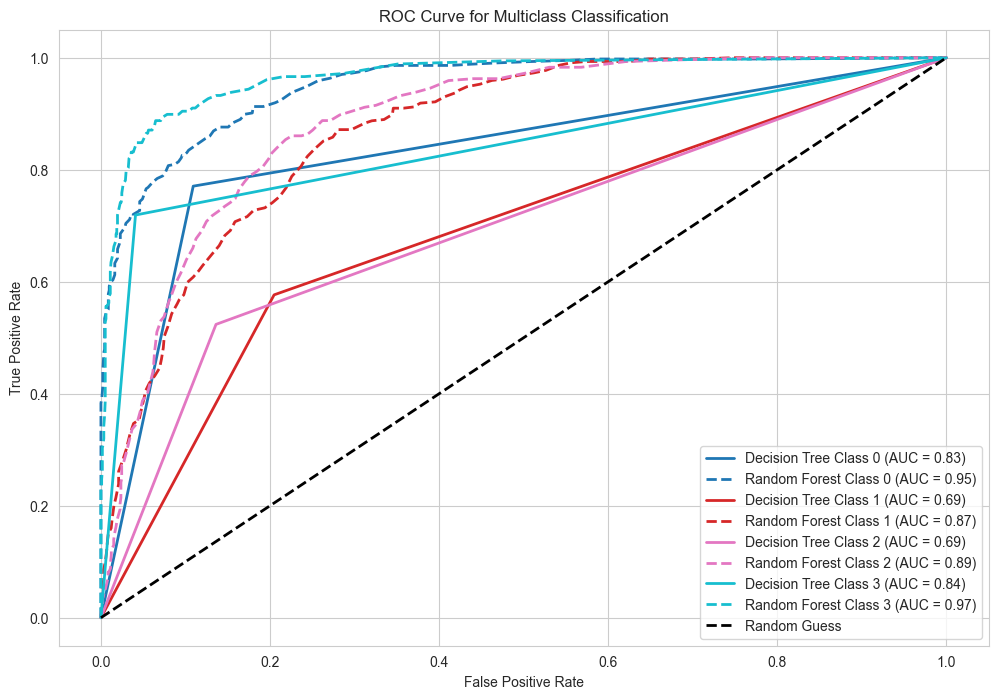

In [142]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize


y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

clf_gini = DecisionTreeClassifier(criterion='gini', random_state=0)
clf_gini.fit(X_train, y_train)
y_pred_gini_proba = clf_gini.predict_proba(X_test)

clf_forest = RandomForestClassifier(random_state=0)
clf_forest.fit(X_train, y_train)
y_pred_forest_proba = clf_forest.predict_proba(X_test)

fpr_gini = dict()
tpr_gini = dict()
roc_auc_gini = dict()
fpr_forest = dict()
tpr_forest = dict()
roc_auc_forest = dict()

for i in range(n_classes):
    fpr_gini[i], tpr_gini[i], _ = roc_curve(y_test_binarized[:, i], y_pred_gini_proba[:, i])
    roc_auc_gini[i] = roc_auc_score(y_test_binarized[:, i], y_pred_gini_proba[:, i])
    fpr_forest[i], tpr_forest[i], _ = roc_curve(y_test_binarized[:, i], y_pred_forest_proba[:, i])
    roc_auc_forest[i] = roc_auc_score(y_test_binarized[:, i], y_pred_forest_proba[:, i])

plt.figure(figsize=(12, 8))
colors = plt.cm.get_cmap('tab10', n_classes)

for i in range(n_classes):
    plt.plot(fpr_gini[i], tpr_gini[i], color=colors(i), lw=2,
             label=f'Decision Tree Class {i} (AUC = {roc_auc_gini[i]:.2f})')
    plt.plot(fpr_forest[i], tpr_forest[i], color=colors(i), linestyle='--', lw=2,
             label=f'Random Forest Class {i} (AUC = {roc_auc_forest[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Z wykresu widać, że Forest Classifier jest zdecydowanie lepszym modelem dla przewidywania każdej z etykiet.

# Wnioski

Ze względu na dobre dopasowanie, wybrałyśmy XGBRegressor oraz Forest Regressor Model (30 drzew) do dalszego etapu projektu. Spośród wielu wytrenowanych modeli, te dwa charakteryzowały się najlepszym dopasowaniem pod względem uśrednionej wartości współczynnika determinacji. Jeśli wyniki po przeprowadzeniu hiperparametryzacji będą niezadowalające, spróbujemy dopasować model klasyfikacji Forest Classifier.